## Analizar palabras Don Quijote

In [166]:
# https://www.opencodez.com/web-development/web-scraping-using-beautiful-soup-word-cloud-part-2.htm

In [189]:
%%writefile read_words.py
def read_words(words_file):
    open_file = open(words_file, 'r')
    words_list =[]
    contents = open_file.readlines()
    for i in range(len(contents)):
         words_list.extend(contents[i].split())
    return words_list    
    open_file.close()
# Creamos una función para convertir texto en palabras


Overwriting read_words.py


In [190]:

from read_words import read_words

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [218]:
#Convertir el texto completo en lista
with open('quijote.txt') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ')
    quijote_text=[i for row in spamreader for i in row]

In [219]:
df_cloud = pd.DataFrame(quijote_text)

In [220]:
df_cloud.count()
df_cloud.describe()

,0
count,387172
unique,39960
top,que
freq,19411


<function matplotlib.pyplot.show(*args, **kw)>

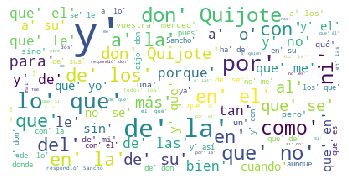

In [223]:
oc_cloud= WordCloud(background_color='white',stopwords= STOPWORDS, max_words=100,
                    max_font_size=50,random_state=1).generate(str(quijote_text))
plt.imshow(oc_cloud)
plt.axis('off')
plt.show

In [14]:
#import pandas, wordcloud, matplotlib libraries
 
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
 

## Web scraping Don Quijote

In [ ]:
# https://www.datacamp.com/community/tutorials/web-scraping-python-nlp



In [152]:
from bs4 import BeautifulSoup
import requests
import pandas
from pandas import DataFrame
import csv

In [153]:
url = 'https://www.gutenberg.org/files/2000/2000-h/2000-h.htm'
r = requests.get(url)
type(r)

requests.models.Response

In [154]:
html = r.text
html[:500]

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">\r\n<html>\r\n  <head>\r\n    <title>El Ingenioso Hidalgo Don Quijote de la Mancha</title>\r\n    <meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1">\r\n    <style type="text/css">\r\n      <!--\r\n      body { margin: 5%; text-align: justify; }\r\n      .verse { font-style: italic; margin-left: 2em; }\r\n      div.toc { font-variant: small-caps; text-align: center; }\r\n      ol.toc { list-style: upper-roman; }\r\n      -->\r\n    </st'

In [155]:
soup = BeautifulSoup(html, "html5lib")
type(soup)

bs4.BeautifulSoup

In [156]:
soup.title

<title>El Ingenioso Hidalgo Don Quijote de la Mancha</title>

In [157]:
# Coger solo las palabras del html
text = soup.get_text()

In [158]:
#Para quitar palabras pequeñas
from nltk.tokenize import RegexpTokenizer

# Create tokenizer
tokenizer = RegexpTokenizer('\w+')

# Create tokens
tokens = tokenizer.tokenize(text)
tokens[:40]

['El',
 'Ingenioso',
 'Hidalgo',
 'Don',
 'Quijote',
 'de',
 'la',
 'Mancha',
 'body',
 'margin',
 '5',
 'text',
 'align',
 'justify',
 'verse',
 'font',
 'style',
 'italic',
 'margin',
 'left',
 '2em',
 'div',
 'toc',
 'font',
 'variant',
 'small',
 'caps',
 'text',
 'align',
 'center',
 'ol',
 'toc',
 'list',
 'style',
 'upper',
 'roman',
 'The',
 'Project',
 'Gutenberg',
 'EBook']

In [159]:
# Initialize new list
words = []

# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())

# Print several items from list as sanity check
words[:8]

['el', 'ingenioso', 'hidalgo', 'don', 'quijote', 'de', 'la', 'mancha']

In [160]:
import nltk
nltk.download('stopwords')

# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('spanish')
sw[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/victormac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [161]:
# Initialize new list
words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Print several list items as sanity check
words_ns[:10]

['ingenioso',
 'hidalgo',
 'don',
 'quijote',
 'mancha',
 'body',
 'margin',
 '5',
 'text',
 'align']

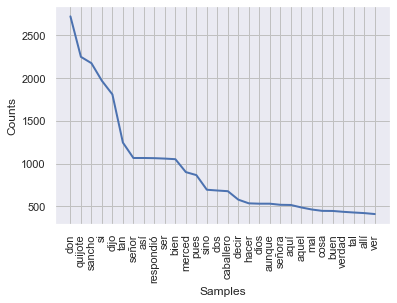

In [163]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(30)

In [164]:
from nltk import FreqDist
import csv

fdist = nltk.FreqDist(words_ns)

with open('wordFeatures.csv', 'w') as output:
    writer = csv.writer(output, delimiter=':')
    writer.writerows(enumerate(fdist, 1))

In [165]:
df2 = pd.read_csv('wordFeatures.csv', index_col=0, sep=':')
df2.head(40)

,ingenioso
1,
2,hidalgo
3,don
4,quijote
5,mancha
6,body
7,margin
8,5
9,text
10,align
